In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')

In [4]:
train=pd.DataFrame(pd.read_csv(r'Trainfile.csv'))
test=pd.DataFrame(pd.read_csv(r'Testfile.csv'))
pd.set_option('display.max_columns', None)
train.drop(columns=['Idx'],inplace=True)             #dropping the Idx coloumn
test.drop(columns=['Idx'],inplace=True)

In [5]:
train[:5]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,45,RL,59.0,7227,Pave,NaN,Reg,HLS,AllPub,Corner,Mod,NAmes,Artery,Norm,1Fam,1.5Unf,6,6,1954,1954,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,832,832,GasA,Gd,Y,SBrkr,832,0,0,832,0,0,1,0,2,1,Gd,4,Typ,0,NaN,Detchd,1962.0,Unf,2,528,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,105500
1,60,RL,NaN,12227,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,6,7,1977,1995,Gable,CompShg,HdBoard,HdBoard,BrkFace,424.0,TA,Gd,CBlock,Gd,Gd,No,ALQ,896,Unf,0,434,1330,GasA,TA,Y,SBrkr,1542,1330,0,2872,1,0,2,1,4,1,TA,11,Typ,1,TA,Attchd,1977.0,Fin,2,619,TA,TA,Y,550,282,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,272000
2,20,RL,65.0,7800,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,7,1967,2004,Hip,CompShg,HdBoard,HdBoard,BrkFace,89.0,TA,TA,PConc,TA,TA,No,ALQ,450,Unf,0,414,864,GasA,Ex,Y,SBrkr,899,0,0,899,0,0,1,0,3,1,Gd,5,Typ,0,NaN,Attchd,1967.0,Fin,1,288,TA,TA,Y,64,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2009,WD,Normal,130000
3,60,RL,88.0,12665,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,8,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,245.0,Gd,TA,PConc,Gd,Gd,Gd,Unf,0,Unf,0,1094,1094,GasA,Ex,Y,SBrkr,1133,1349,0,2482,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2005.0,Fin,3,642,TA,TA,Y,144,39,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,281213
4,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,Y,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008.0,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


In [6]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1138.000000,938.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1132.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1070.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000
mean,57.618629,70.484009,10273.514060,6.111599,5.597540,1970.995606,1984.790861,102.795053,440.527241,42.954306,562.456063,1045.937610,1153.873462,355.300527,6.057996,1515.231986,0.425308,0.062390,1.556239,0.391037,2.873462,1.049209,6.538664,0.603691,1978.552336,1.750439,470.307557,90.373462,47.494728,23.067663,2.947276,14.570299,2.434974,40.179262,6.332162,2007.847100,179328.707381
std,42.519037,24.983885,7742.762753,1.374100,1.112681,30.388180,20.618711,179.089584,452.563788,155.308430,442.891582,438.202684,385.710814,438.400418,49.254675,528.966115,0.518905,0.245577,0.549166,0.505892,0.822816,0.220426,1.636436,0.634860,24.434762,0.760228,217.823059,121.890193,67.077467,62.790978,25.120656,53.994274,36.868419,496.795058,2.722983,1.326741,76642.678880
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7560.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,788.000000,866.750000,0.000000,0.000000,1130.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.250000,1.000000,312.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,50.000000,70.000000,9496.000000,6.000000,5.000000,1972.000000,1993.000000,0.000000,384.500000,0.000000,464.000000,984.000000,1080.000000,0.000000,0.000000,1469.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162450.000000
75%,70.000000,80.000000,11596.000000,7.000000,6.000000,2000.000000,2004.000000,164.250000,706.000000,0.000000,796.750000,1268.000000,1378.000000,741.000000,0.000000,1774.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,210750.000000
max,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,523.000000,552.000000,320.000000,410.000000,648.000000,15500.000000,12.000000,2010.000000,745000.000000


In [7]:
# relacing nan values in categorical coloumns with mode values

def nan_handling(df):
    df['LotFrontage']=df.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))
    df['Utilities'].fillna(train['Utilities'].mode(),inplace=True)
    df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0],inplace=True)
    df['MasVnrType'].fillna(df['MasVnrType'].mode()[0],inplace=True)
    df['Electrical'].fillna(df['Electrical'].mode()[0],inplace=True)
    return df

In [8]:
train=nan_handling(train)
test=nan_handling(test)

In [9]:
# normalizing all coloumns 

def normalize(ser):
    if ser.max()-ser.min()==0.0: return ser*1.0
    norm_ser=(ser-ser.min())/(ser.max()-ser.min())
    return norm_ser

In [10]:
# encoding categrical features
def encode(ser):
    decode=ser.value_counts().index.tolist()[::-1]
    if (ser.isna()).mean()>0.0:
        decode=[np.nan]+decode
    encoded_ser=ser.replace({v:i for i,v in enumerate(decode)})
    return encoded_ser

In [11]:
def fix_data(df_orig):
    df=df_orig.copy(deep=True)
    #removing nan in non categorical attributes
    df['LotFrontage'].fillna(0,inplace=True)
    df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(),inplace=True)
    for i in df.columns.tolist():
        if df[i].dtype==object:
            df[i]=encode(df[i])
        df[i]=normalize(df[i])
    return df    

In [12]:
Y_df=train['SalePrice']/1000000
X_df=train.drop(columns=['SalePrice'])

X_train=fix_data(X_df).values.T
Y_train=Y_df.values.reshape((1,X_train.shape[1]))

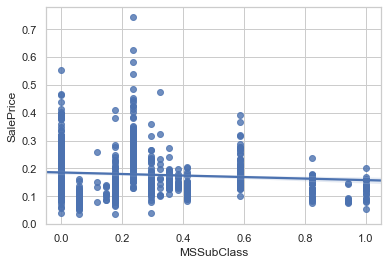

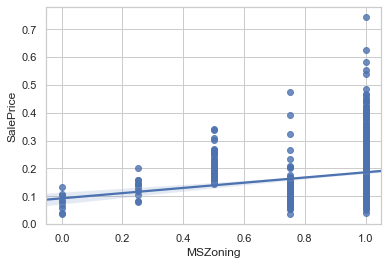

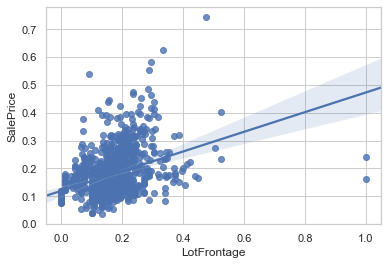

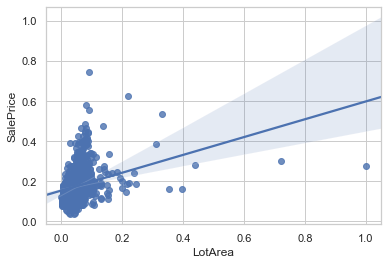

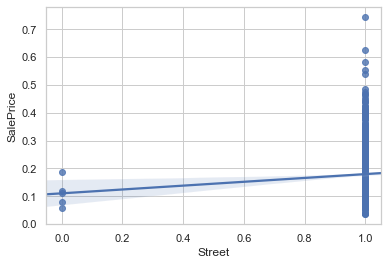

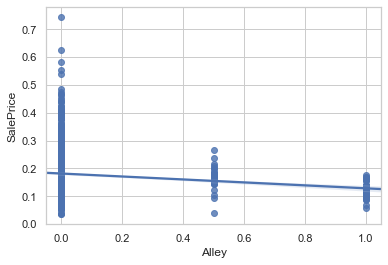

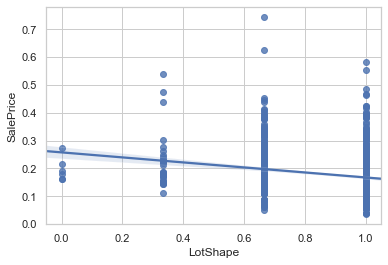

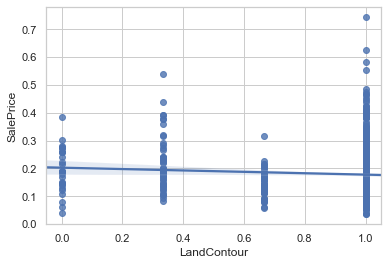

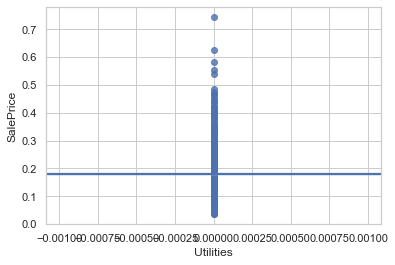

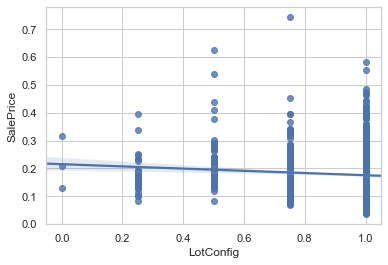

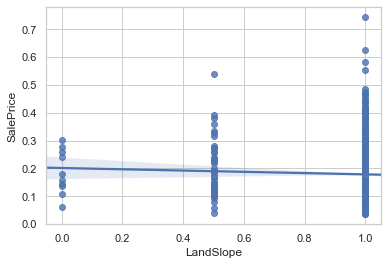

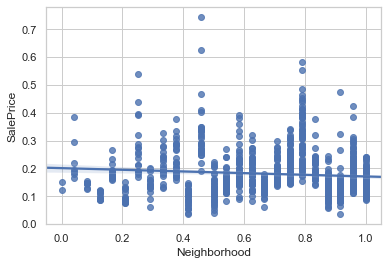

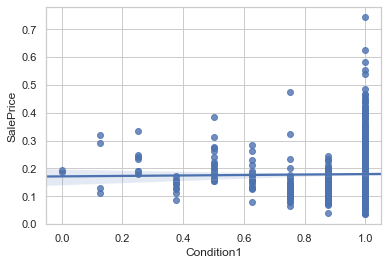

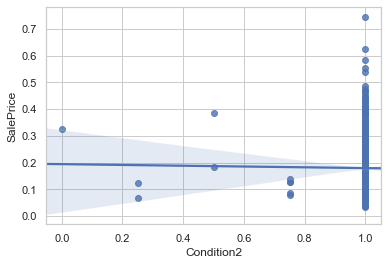

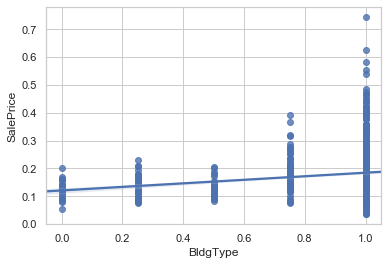

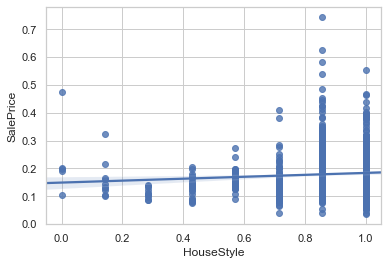

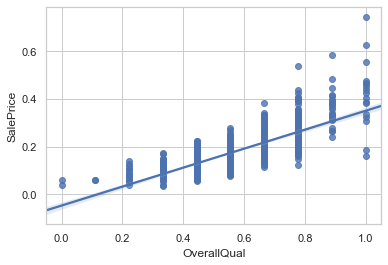

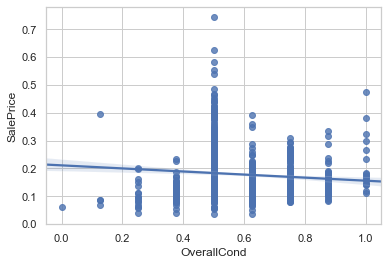

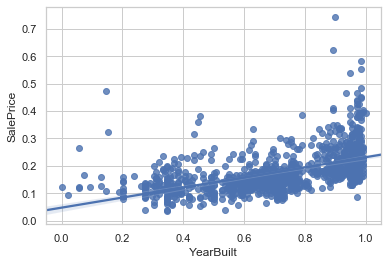

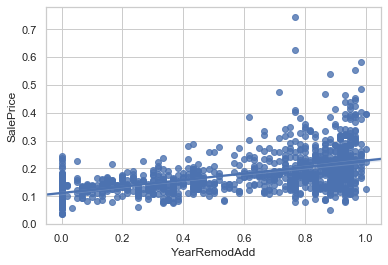

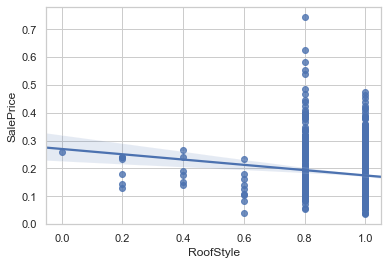

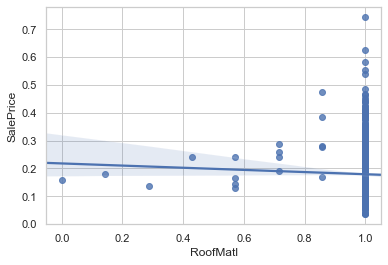

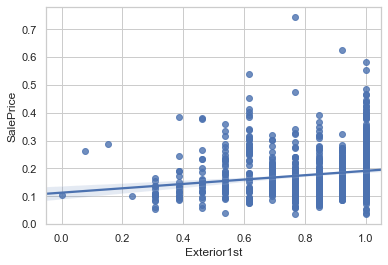

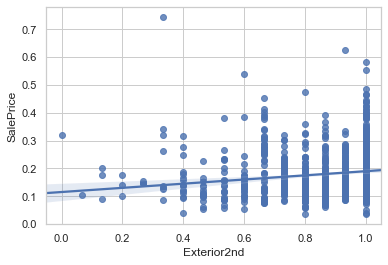

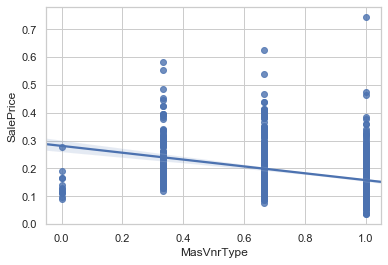

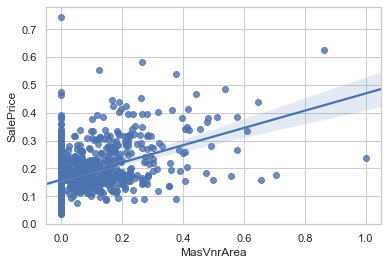

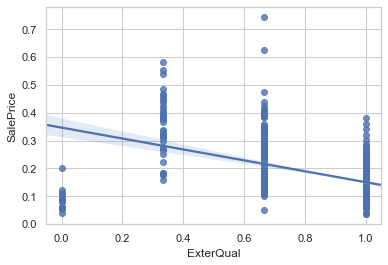

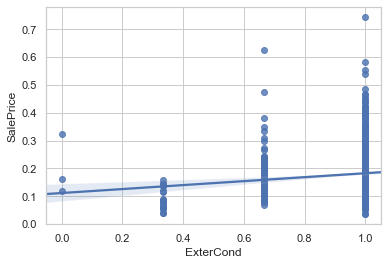

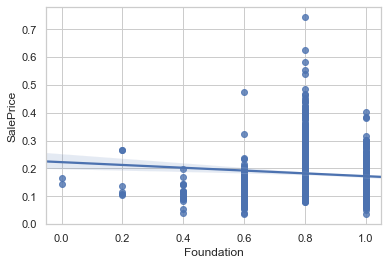

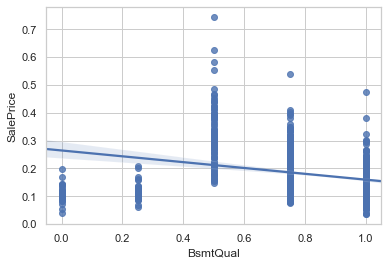

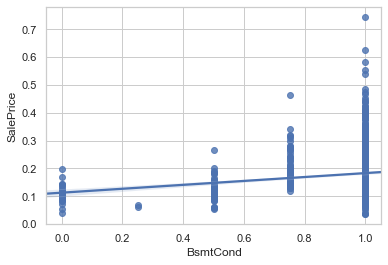

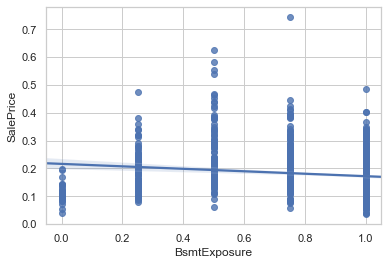

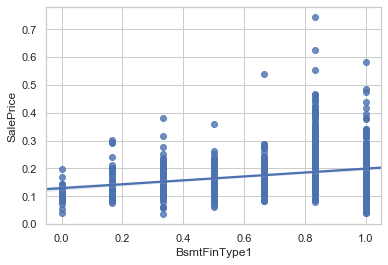

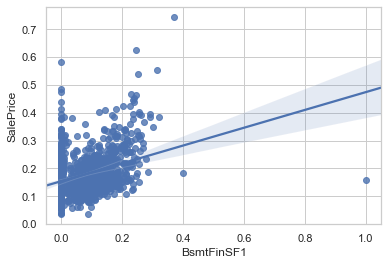

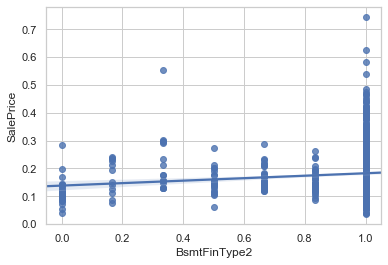

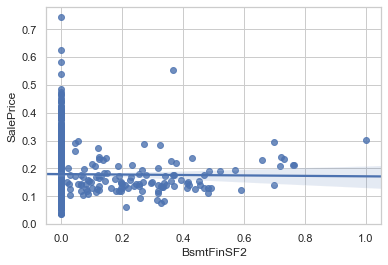

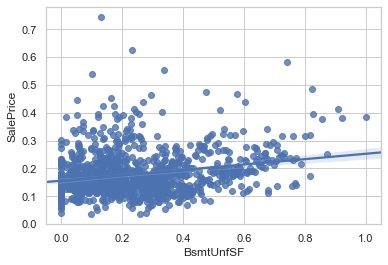

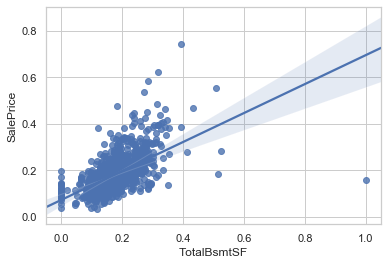

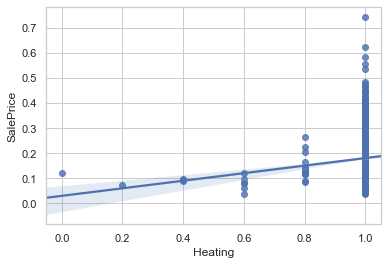

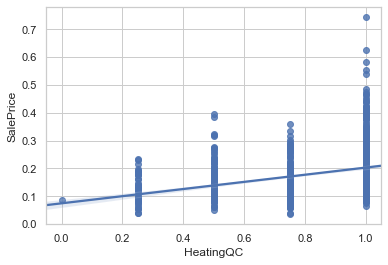

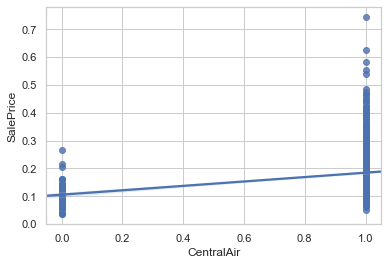

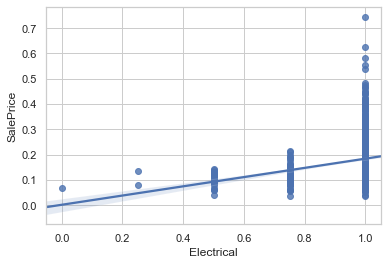

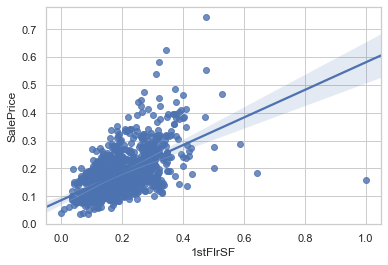

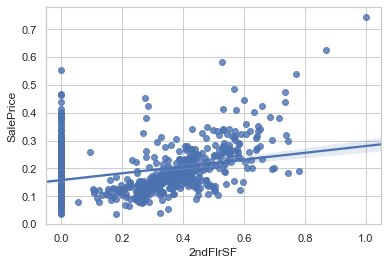

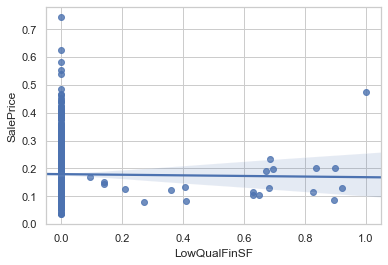

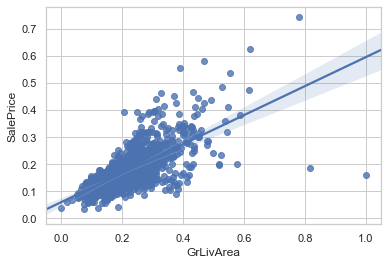

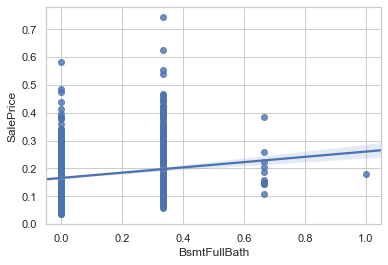

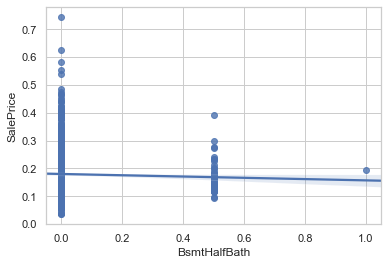

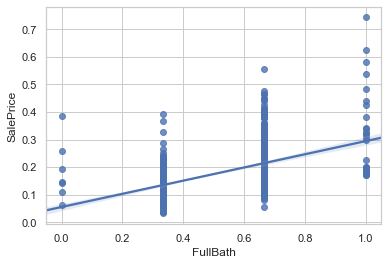

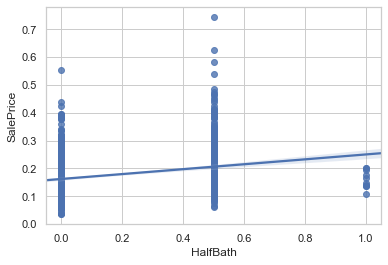

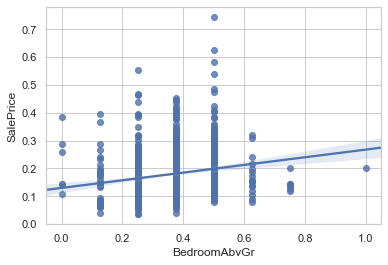

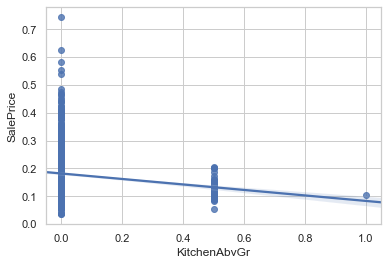

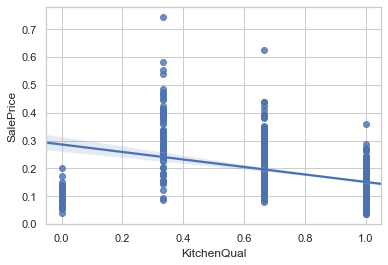

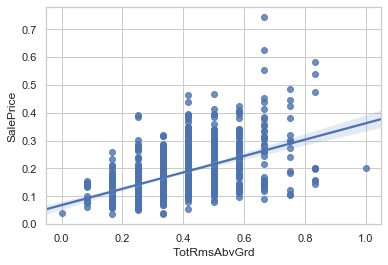

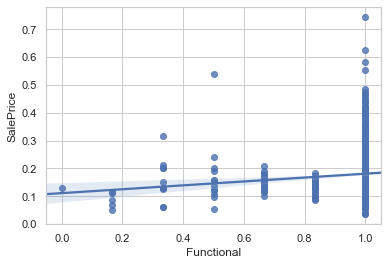

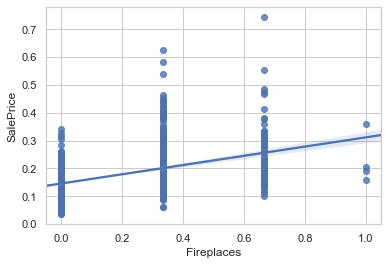

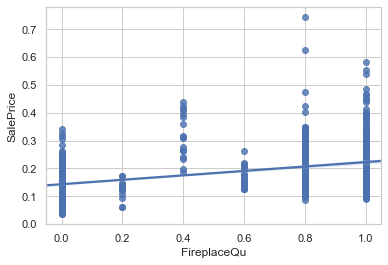

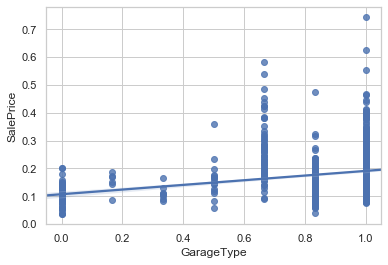

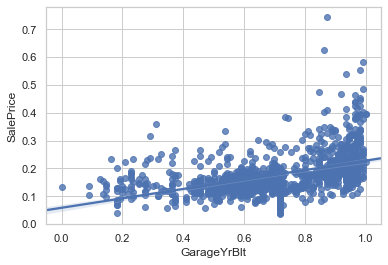

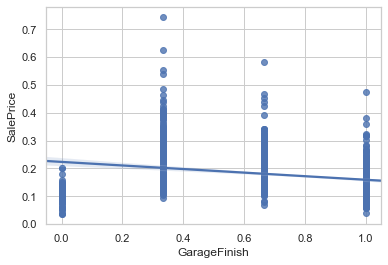

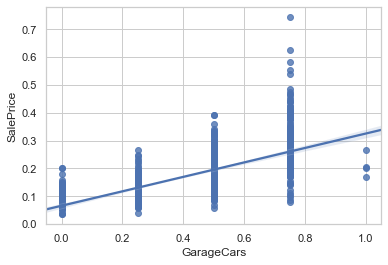

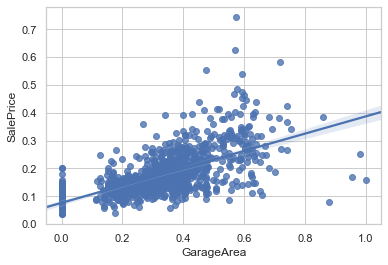

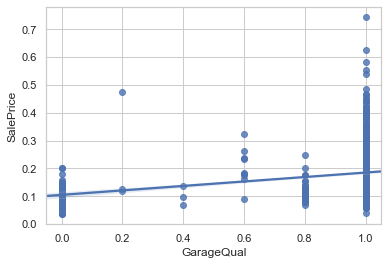

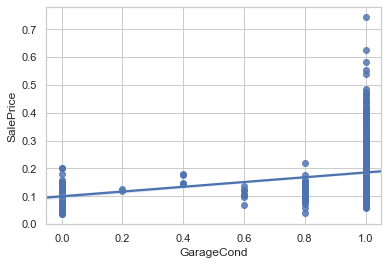

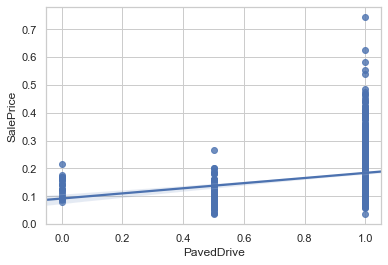

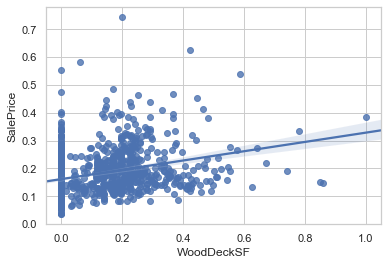

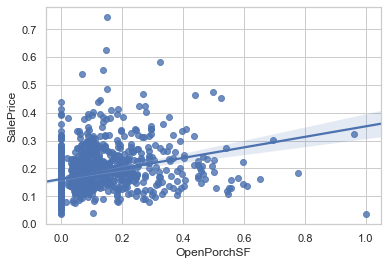

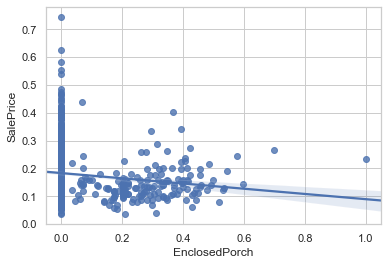

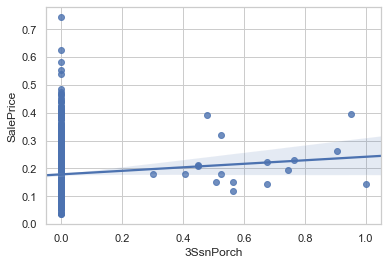

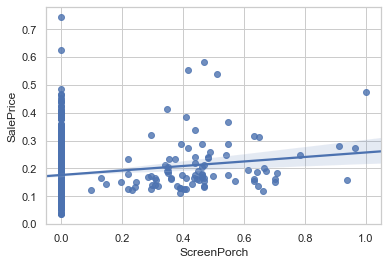

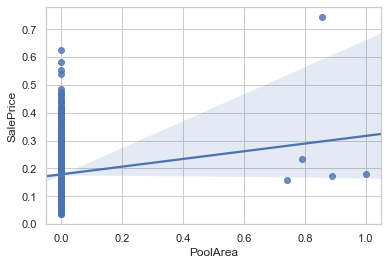

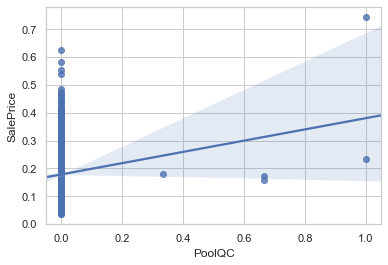

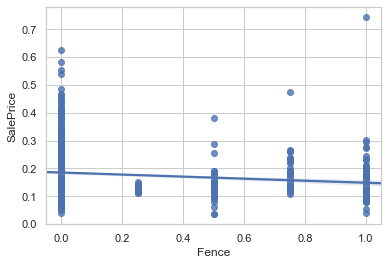

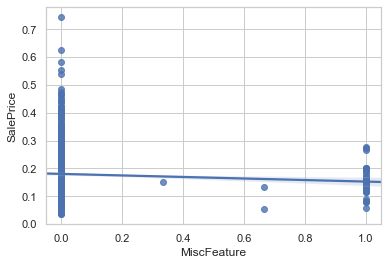

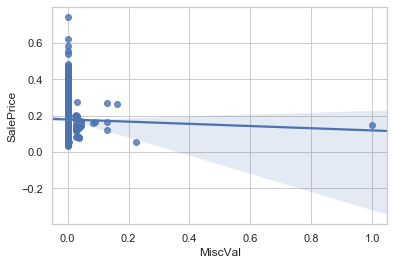

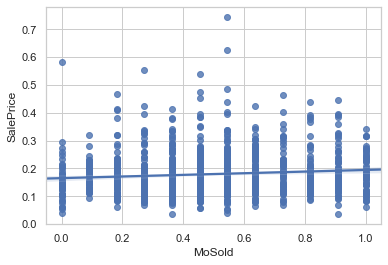

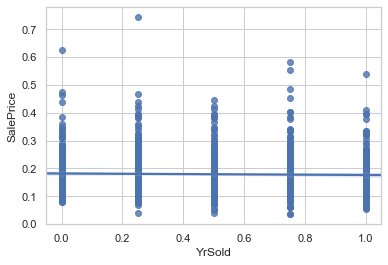

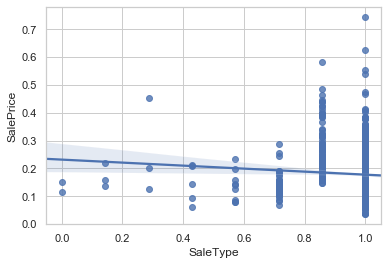

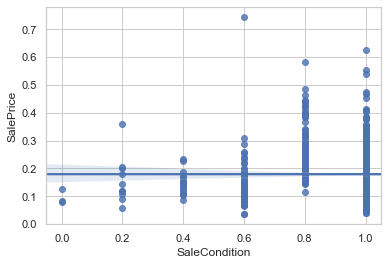

In [13]:
k=fix_data(X_df)
for i in list(k.columns):
    sns.regplot(x=k[i],y=Y_df)
    plt.show()

In [14]:
def initialize(X,Y):
    w=np.random.randn(1,X.shape[0])*0.001
    b=np.zeros((1,X.shape[1]))
    m=X.shape[1]
    return w,b,m


In [15]:
#initial model without SGD

def linreg_without_SGD(X,Y,learning_rate=0.0005,num_iter=1000,printcost=True):
    w,b,m=initialize(X,Y)
    for i in range(num_iter):
        Y_hat=np.dot(w,X)+b
        diff=Y-Y_hat
        loss=0.5*np.mean(np.square(diff))
        if i%10000==0 and printcost:
            print('loss at iter %d is %f'%(i,loss))
        dw=-1.0/m*(np.dot(diff,X.T))
        db=-1.0/m*np.sum(diff)
        w=w-learning_rate*dw
        b=b-learning_rate*db
        #print('lol',Y_hat.max())
    return w,b,loss
        

In [16]:
#linear model with SGD

def linreg_SGD(X,Y,learning_rate=0.0005,batch_size=32,epochs=1000,printcost=True):
    w,b,m=initialize(X,Y)
    dic={}
    b=0.0
    for i in range(1,epochs+1):
        batch_start_index=0
        if batch_size<m:
            batch_end_index=batch_size
        else:
            batch_end_index=m
        while batch_end_index<=m:
            X_batch=X[:,batch_start_index:batch_end_index]
            Y_batch=Y[:,batch_start_index:batch_end_index]
            Y_hat=np.dot(w,X_batch)+b
            diff=Y_hat-Y_batch
            loss=0.5*np.mean(np.square(diff))
            #if batch_end_index==m: print(loss)
                
            dw=1.0/batch_size*(np.dot(diff,X_batch.T))
            db=1.0/batch_size*np.sum(diff)
            w=w-learning_rate*dw
            b=b-learning_rate*db
            if batch_end_index==m:
                break
            batch_start_index+=batch_size
            batch_end_index+=batch_size
            if batch_end_index>m:
                batch_end_index=m
        dic[i]=loss
        if i%1000==0 and printcost: print('cost on epoch ',i,' is ',loss)
    return w,b,pd.Series(dic)

In [17]:
def evaluate(X,Y,w,b):
    pred=np.dot(w,X)+b.mean()
    mape=np.mean((np.absolute((Y-pred)/Y)))
    accuracy=100*(1-mape)
    return accuracy

In [18]:
w,b,loss=linreg_SGD(X_train,Y_train,batch_size=32,epochs=10000,learning_rate=0.0005)

cost on epoch  1000  is  0.0005621272587796901
cost on epoch  2000  is  0.00045067203319587644
cost on epoch  3000  is  0.00041996636294477403
cost on epoch  4000  is  0.0004068013283592604
cost on epoch  5000  is  0.0003993584516152196
cost on epoch  6000  is  0.00039468828195221036
cost on epoch  7000  is  0.0003916891019023643
cost on epoch  8000  is  0.0003897928765101311
cost on epoch  9000  is  0.0003886594859226492
cost on epoch  10000  is  0.00038807342193493443


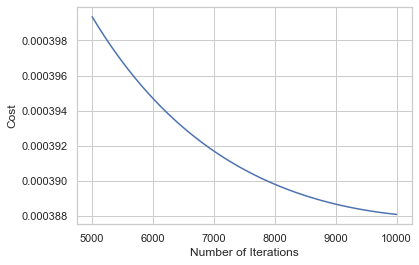

In [19]:
ax=sns.lineplot(data=loss[5000:])
ax.set(xlabel='Number of Iterations', ylabel='Cost')
plt.show()

In [20]:
accuracy=evaluate(X_train,Y_train,w,b)
print("Train accuracy is %f percent" %(accuracy))

Train accuracy is 88.421533 percent


In [21]:
# Model Evaluation
Y_df=test['SalePrice']/1000000
X_df=test.drop(columns=['SalePrice'])

X_test=fix_data(X_df).values.T
Y_test=Y_df.values.reshape((1,X_test.shape[1]))

In [22]:
accuracy=evaluate(X_test,Y_test,w,b)
print("Test accuracy is %f percent" %(accuracy))

Test accuracy is 85.930917 percent


In [23]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge
from sklearn import metrics
regressor = Ridge()  
regressor.fit(X_train.T, Y_train.T)
Y_pred=regressor.predict(X_train.T)
train_accu=(1-metrics.mean_absolute_error(Y_train.T,Y_pred))*100
Ytest_pred=regressor.predict(X_test.T)
test_accu=(1-metrics.mean_absolute_error(Y_test.T,Ytest_pred))*100
print(f"Using sklearn model with regularization\ntrain accuracy is {train_accu}\ntest accuracy is {test_accu}" )

Using sklearn model with regularization
train accuracy is 98.05741551388958
test accuracy is 97.60503799314533
